# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [144]:
import pandas
pandas.__version__

import pandas as pd

# Read the CSV file
covid19_data = pd.read_csv("data/01-09-2021.csv")
#covid19_data = pd.read_csv("data/03-09-2023.csv")



#### Display the top 5 rows in the data

In [145]:
covid19_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-10 05:22:12,33.93911,67.709953,53400,2264,43740,7396,Afghanistan,137.175124,4.239700
1,NaN,NaN,NaN,Albania,2021-01-10 05:22:12,41.15330,20.168300,63033,1233,37327,24473,Albania,2190.318994,1.956118
2,NaN,NaN,NaN,Algeria,2021-01-10 05:22:12,28.03390,1.659600,101913,2803,69011,30099,Algeria,232.407243,2.750385
3,NaN,NaN,NaN,Andorra,2021-01-10 05:22:12,42.50630,1.521800,8586,85,7724,777,Andorra,11112.405358,0.989984
4,NaN,NaN,NaN,Angola,2021-01-10 05:22:12,-11.20270,17.873900,18156,416,13205,4535,Angola,55.242049,2.291254


#### Show the information of the dataset

In [146]:
covid19_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3834 non-null   object 
 3   Country_Region       4012 non-null   object 
 4   Last_Update          4012 non-null   object 
 5   Lat                  3923 non-null   float64
 6   Long_                3923 non-null   float64
 7   Confirmed            4012 non-null   int64  
 8   Deaths               4012 non-null   int64  
 9   Recovered            4012 non-null   int64  
 10  Active               4012 non-null   int64  
 11  Combined_Key         4012 non-null   object 
 12  Incident_Rate        3923 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.9+ KB


#### Show the sum of missing values of features in the dataset

In [137]:
covid19_data.isnull().sum()

FIPS                   747
Admin2                 742
Province_State         178
Country_Region           0
Last_Update              0
Lat                     89
Long_                   89
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     49
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [138]:
covid19_data.groupby('Country_Region')['Confirmed'].sum().reset_index()

,Country_Region,Confirmed
0,Afghanistan,53400
1,Albania,63033
2,Algeria,101913
3,Andorra,8586
4,Angola,18156
...,...,...
195,West Bank and Gaza,146701
196,Winter Olympics 2022,0
197,Yemen,2104
198,Zambia,26567


#### Show the number of Deaths by Country

In [139]:
covid19_data.groupby('Country_Region')['Deaths'].sum().reset_index()

,Country_Region,Deaths
0,Afghanistan,2264
1,Albania,1233
2,Algeria,2803
3,Andorra,85
4,Angola,416
...,...,...
195,West Bank and Gaza,1583
196,Winter Olympics 2022,0
197,Yemen,610
198,Zambia,464


#### Show the number of Recovered cases by Country

In [140]:
covid19_data.groupby('Country_Region')['Recovered'].sum().reset_index()

,Country_Region,Recovered
0,Afghanistan,43740
1,Albania,37327
2,Algeria,69011
3,Andorra,7724
4,Angola,13205
...,...,...
195,West Bank and Gaza,130102
196,Winter Olympics 2022,0
197,Yemen,1407
198,Zambia,20512


#### Show the number of Active Cases by Country

In [141]:
covid19_data.groupby('Country_Region')['Active'].sum().reset_index()

,Country_Region,Active
0,Afghanistan,7396
1,Albania,24473
2,Algeria,30099
3,Andorra,777
4,Angola,4535
...,...,...
195,West Bank and Gaza,15016
196,Winter Olympics 2022,0
197,Yemen,87
198,Zambia,5591


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [257]:
covid19_data.groupby('Country_Region')[['Confirmed','Deaths','Recovered','Active']].last('Last_Update').reset_index()

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,53400,2264,43740,7396
1,Albania,63033,1233,37327,24473
2,Algeria,101913,2803,69011,30099
3,Andorra,8586,85,7724,777
4,Angola,18156,416,13205,4535
...,...,...,...,...,...
195,West Bank and Gaza,146701,1583,130102,15016
196,Winter Olympics 2022,0,0,0,0
197,Yemen,2104,610,1407,87
198,Zambia,26567,464,20512,5591


### Question 3

### Show the countries with no recovered cases

In [142]:
covid19_data[covid19_data['Recovered'] == 0].groupby('Country_Region')['Recovered'].sum().reset_index()

,Country_Region,Recovered
0,Antarctica,0
1,Australia,0
2,Belgium,0
3,Canada,0
4,China,0
5,Colombia,0
6,Germany,0
7,India,0
8,Kiribati,0
9,"Korea, North",0


#### Show the countries with no confirmed cases

In [259]:
covid19_data[covid19_data['Confirmed'] == 0].groupby('Country_Region')['Confirmed'].sum().reset_index()

,Country_Region,Confirmed
0,Antarctica,0
1,Canada,0
2,Colombia,0
3,India,0
4,Kiribati,0
5,"Korea, North",0
6,Malaysia,0
7,Mexico,0
8,Nauru,0
9,New Zealand,0


#### Show the countries with no deaths

In [260]:
covid19_data[covid19_data['Deaths'] == 0].groupby('Country_Region')['Deaths'].sum().reset_index()

,Country_Region,Deaths
0,Antarctica,0
1,Australia,0
2,Belgium,0
3,Cambodia,0
4,Canada,0
5,China,0
6,Colombia,0
7,Denmark,0
8,Dominica,0
9,France,0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [261]:
covid19_data[['Country_Region','Last_Update','Confirmed', 'Deaths', 'Recovered']].nlargest(10,'Confirmed').reset_index()

,index,Country_Region,Last_Update,Confirmed,Deaths,Recovered
0,215,France,2021-01-10 05:22:12,2762120,67229,178036
1,3957,United Kingdom,2021-01-10 05:22:12,2613838,88347,0
2,648,Turkey,2021-01-10 05:22:12,2317118,22631,2190047
3,268,India,2021-01-10 05:22:12,1965556,50027,1861400
4,6,Argentina,2021-01-10 05:22:12,1714409,44417,1504330
5,65,Brazil,2021-01-10 05:22:12,1540513,48298,1350513
6,488,Poland,2021-01-10 05:22:12,1376389,31011,1113738
7,286,Iran,2021-01-10 05:22:12,1280438,56100,1067466
8,592,South Africa,2021-01-10 05:22:12,1214176,32824,956712
9,263,India,2021-01-10 05:22:12,926767,12138,905158


#### Show the Top 10 Countries with Active cases

In [262]:
covid19_data[['Country_Region','Last_Update','Confirmed', 'Deaths', 'Active']].nlargest(10,'Active').reset_index()

,index,Country_Region,Last_Update,Confirmed,Deaths,Active
0,3957,United Kingdom,2021-01-10 05:22:12,2613838,88347,2543297
1,215,France,2021-01-10 05:22:12,2762120,67229,2516855
2,858,US,2021-01-10 05:22:12,907077,12090,894987
3,475,Peru,2021-01-10 05:22:12,454697,42786,411911
4,1277,US,2021-01-10 05:22:12,415991,8219,407772
5,754,US,2021-01-10 05:22:12,374740,5767,368973
6,608,Spain,2021-01-10 05:22:12,421295,11971,368588
7,584,Serbia,2021-01-10 05:22:12,356125,3513,352612
8,603,Spain,2021-01-10 05:22:12,386595,8828,351564
9,392,Mexico,2021-01-10 05:22:12,364770,18060,346710


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [263]:
import matplotlib.pyplot as plt

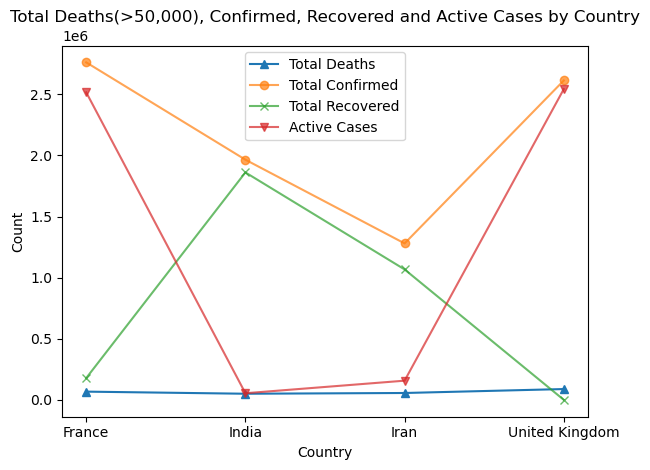

In [264]:
# Filter rows where total deaths exceed 50,000
filtered_df = covid19_data[covid19_data['Deaths'] > 50000]

# Create a bar plot for country-wise data
plt.plot(filtered_df['Country_Region'], filtered_df['Deaths'], marker='^', label='Total Deaths')
plt.plot(filtered_df['Country_Region'], filtered_df['Confirmed'], marker='o', label='Total Confirmed', alpha=0.7)
plt.plot(filtered_df['Country_Region'], filtered_df['Recovered'], marker='x', label='Total Recovered', alpha=0.7)
plt.plot(filtered_df['Country_Region'], filtered_df['Active'], marker='v', label='Active Cases', alpha=0.7)

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Total Deaths(>50,000), Confirmed, Recovered and Active Cases by Country')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [5]:
import plotly.express as px

In [6]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [7]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

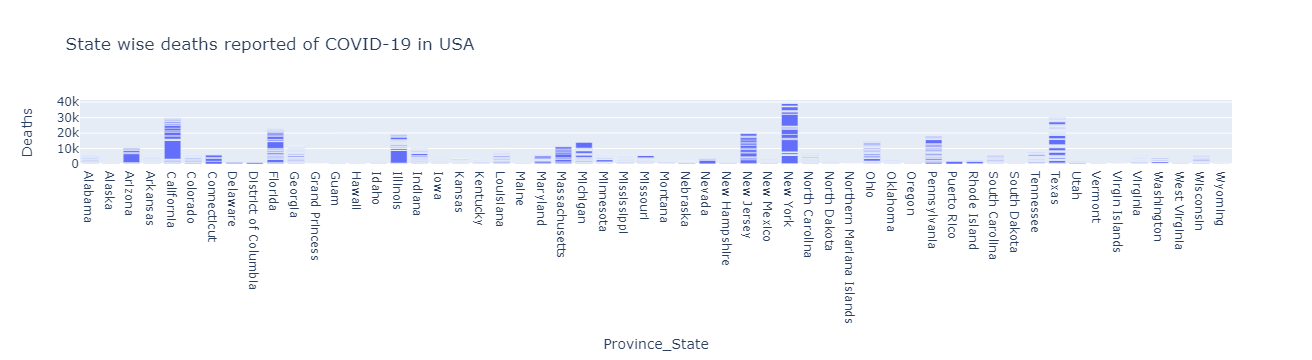

In [56]:
#Filter Dataset
filtered_df = covid19_data[(covid19_data['Country_Region'] == 'US') & (covid19_data['Deaths'] > 0)]
#filtered_df = covid19_data[(covid19_data['Country_Region'] == 'US') & (covid19_data['Deaths'] > 0)].groupby('Province_State')['Deaths'].sum()

# Create a plot
fig = px.bar(filtered_df, x='Province_State', y='Deaths', 
            title="State wise deaths reported of COVID-19 in USA")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

# Show the plot
fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

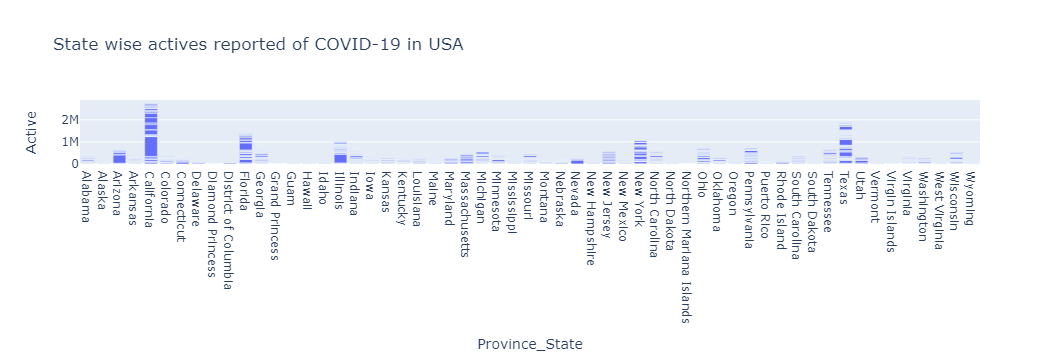

In [58]:
#Filter Dataset
filtered_df = covid19_data[(covid19_data['Country_Region'] == 'US') & (covid19_data['Active'] > 0)]
#filtered_df = covid19_data[(covid19_data['Country_Region'] == 'US') & (covid19_data['Active'] > 0)].groupby('Province_State')['Active'].sum()

# Create a plot
fig = px.bar(filtered_df, x='Province_State', y='Active', 
            title="State wise actives reported of COVID-19 in USA")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

# Show the plot
fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

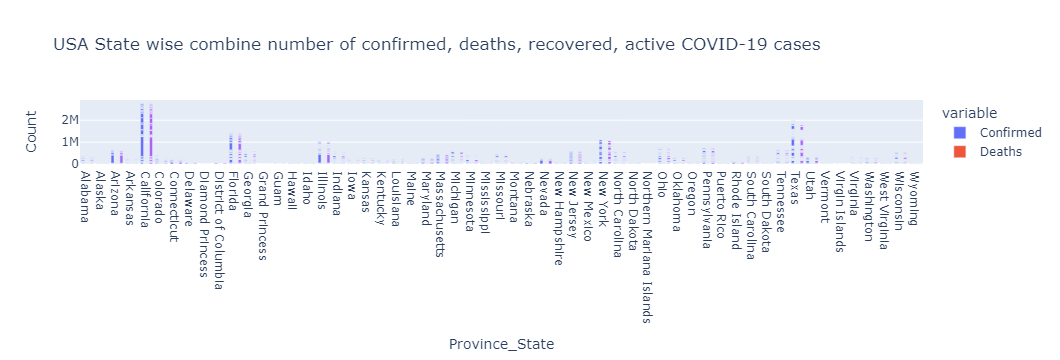

In [97]:
import plotly.graph_objects as go

#Filter Dataset
#filtered_df = covid19_data[(covid19_data['Country_Region'] == 'US') & (covid19_data['Active'] > 0)][['Province_State','Confirmed','Deaths','Recovered', 'Active']].groupby('Province_State')[['Confirmed','Deaths','Recovered','Active']].sum()
filtered_df = covid19_data[(covid19_data['Country_Region'] == 'US') & (covid19_data['Active'] > 0)][['Province_State','Confirmed','Deaths','Recovered', 'Active']]

# Create a bar chart using Plotly
fig = px.bar(filtered_df, x='Province_State', y=['Confirmed', 'Deaths', 'Recovered', 'Active'], 
             barmode='group', title='USA State wise combine number of confirmed, deaths, recovered, active COVID-19 cases')
fig.update_layout(xaxis_title='Province_State', yaxis_title='Count')

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

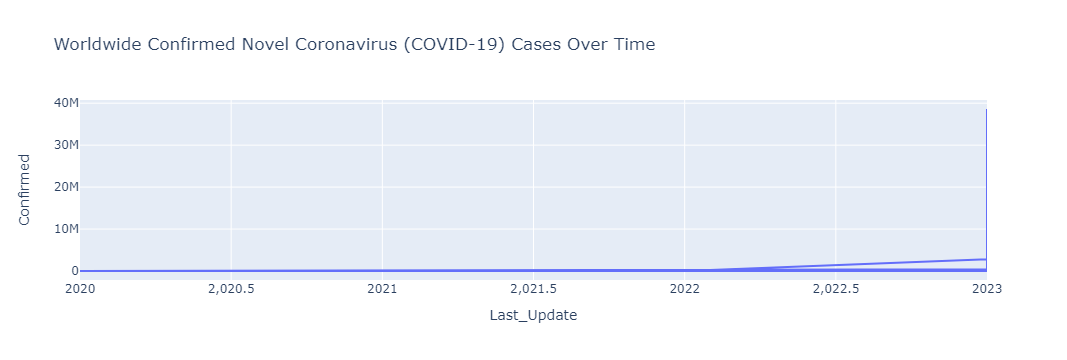

In [143]:
import plotly.io as pio
import plotly.graph_objects as go

#get all historical dataset
df = pd.read_csv("data/03-09-2023.csv")

# Convert the 'Last_Update' column to a datetime object
df['Last_Update'] = pd.to_datetime(df['Last_Update'])

# Extract the year into a new column
df['Last_Update'] = df['Last_Update'].dt.year

#Filter Dataset
filtered_df = df[(df['Confirmed'] > 0) & (df['Country_Region'].notna())].groupby('Last_Update')['Confirmed'].sum()

# Create a scatter plot
trace = go.Scatter(x=df['Last_Update'], y=df['Confirmed'], mode='lines')

# Create a layout for the plot
layout = go.Layout(title='Worldwide Confirmed Novel Coronavirus (COVID-19) Cases Over Time', xaxis=dict(title='Last_Update'), yaxis=dict(title='Confirmed'))

# Create a Figure object
fig = go.Figure(data=[trace], layout=layout)

# Display the plot
pio.show(fig)